# The purpose of this project 
is to develop a sophisticated system for the detection of credit card fraudulent activities. With the increasing use of technology, credit card fraud has become a major concern for consumers and financial institutions, resulting in significant financial losses. To address this issue, it is essential to have systems in place that can detect fraudulent activities and minimize losses.

One of the key challenges in detecting credit card fraud is the imbalance in the distribution of fraudulent and non-fraudulent transactions. Fraudulent transactions constitute a small fraction of all transactions, making it difficult to detect them using traditional methods.

To overcome this challenge, I have obtained a credit card fraudulent activities dataset from Kaggle. The dataset will be used to analyze the relationships between various features and detect fraudulent transactions. Through exploratory data analysis, I aim to gain a deeper understanding of the dataset and develop a robust model for the detection of fraudulent activities. The link to the dataset has been providedt: https://www.kaggle.com/mlg-ulb/creditcardfraud



# Goal: 
The goal of this project is to use machine learning techniques to improve the accuracy of detecting credit card fraudulent activities. The model will be trained on a dataset of credit card transactions and the goal is to improve the measure called Area Under the Precision-Recall Curve (AUPRC). Additionally, the project aim to acquire more knowledge about the financial industry and how to apply machine learning to real-world problems.

In [38]:
#importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
#from sklearn.metrics import classification_report, average_precision_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.feature_selection import mutual_info_classif


#Importing models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



# **Data Preprocessing**

In [39]:
original=pd.read_csv("creditcard.csv")
df=original.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The code reads a CSV file named "creditcard.csv" into a Pandas dataframe "original", creates a copy of it in another dataframe "df", and displays

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

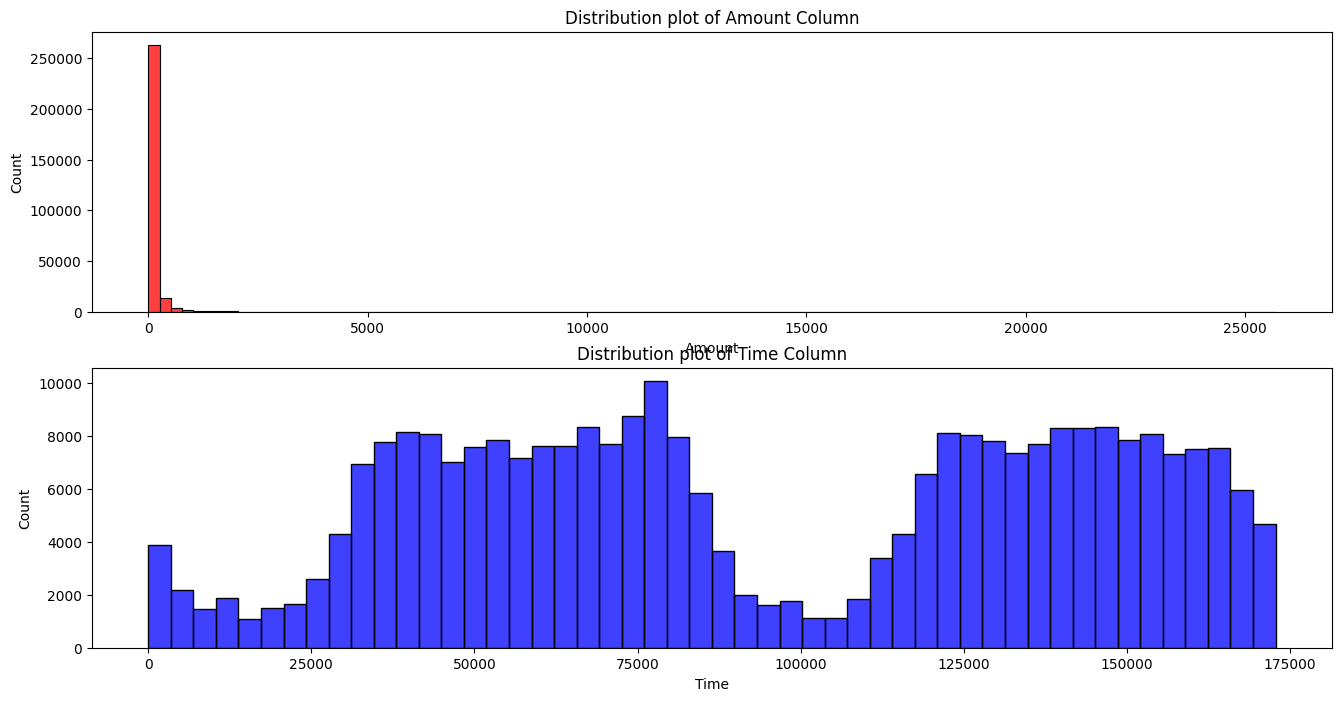

In [41]:
#Draw distribution plot for Time and Amount
fig, ax=plt.subplots(2,1, figsize=(16,8))
sns.histplot(df.Amount,bins=100, color='r', ax=ax[0]);
ax[0].set_title("Distribution plot of Amount Column")
sns.histplot(df.Time,bins=50, color='b',ax=ax[1]);
ax[1].set_title("Distribution plot of Time Column");

The code creates a 2x1 figure with subplots, plots a histogram of the 'Amount' column in red with 500 bins and a title "Distribution plot of Amount Column" on the first subplot and a histogram of the 'Time' column in blue with 50 bins and a title "Distribution plot of Time Column" on the second subplot using seaborn's "histplot" function.

In [42]:

max(df.Time)/(60*60) # this is equivalent to 2 days almost so try to convert out time into hrs(total time period is 48 hrs)

47.99777777777778

In [43]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **Handle Missing Values**

In [44]:
df.isna().sum() #Check if any values are missing--maybe there is a correlation with mssing values and fradulent activities

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

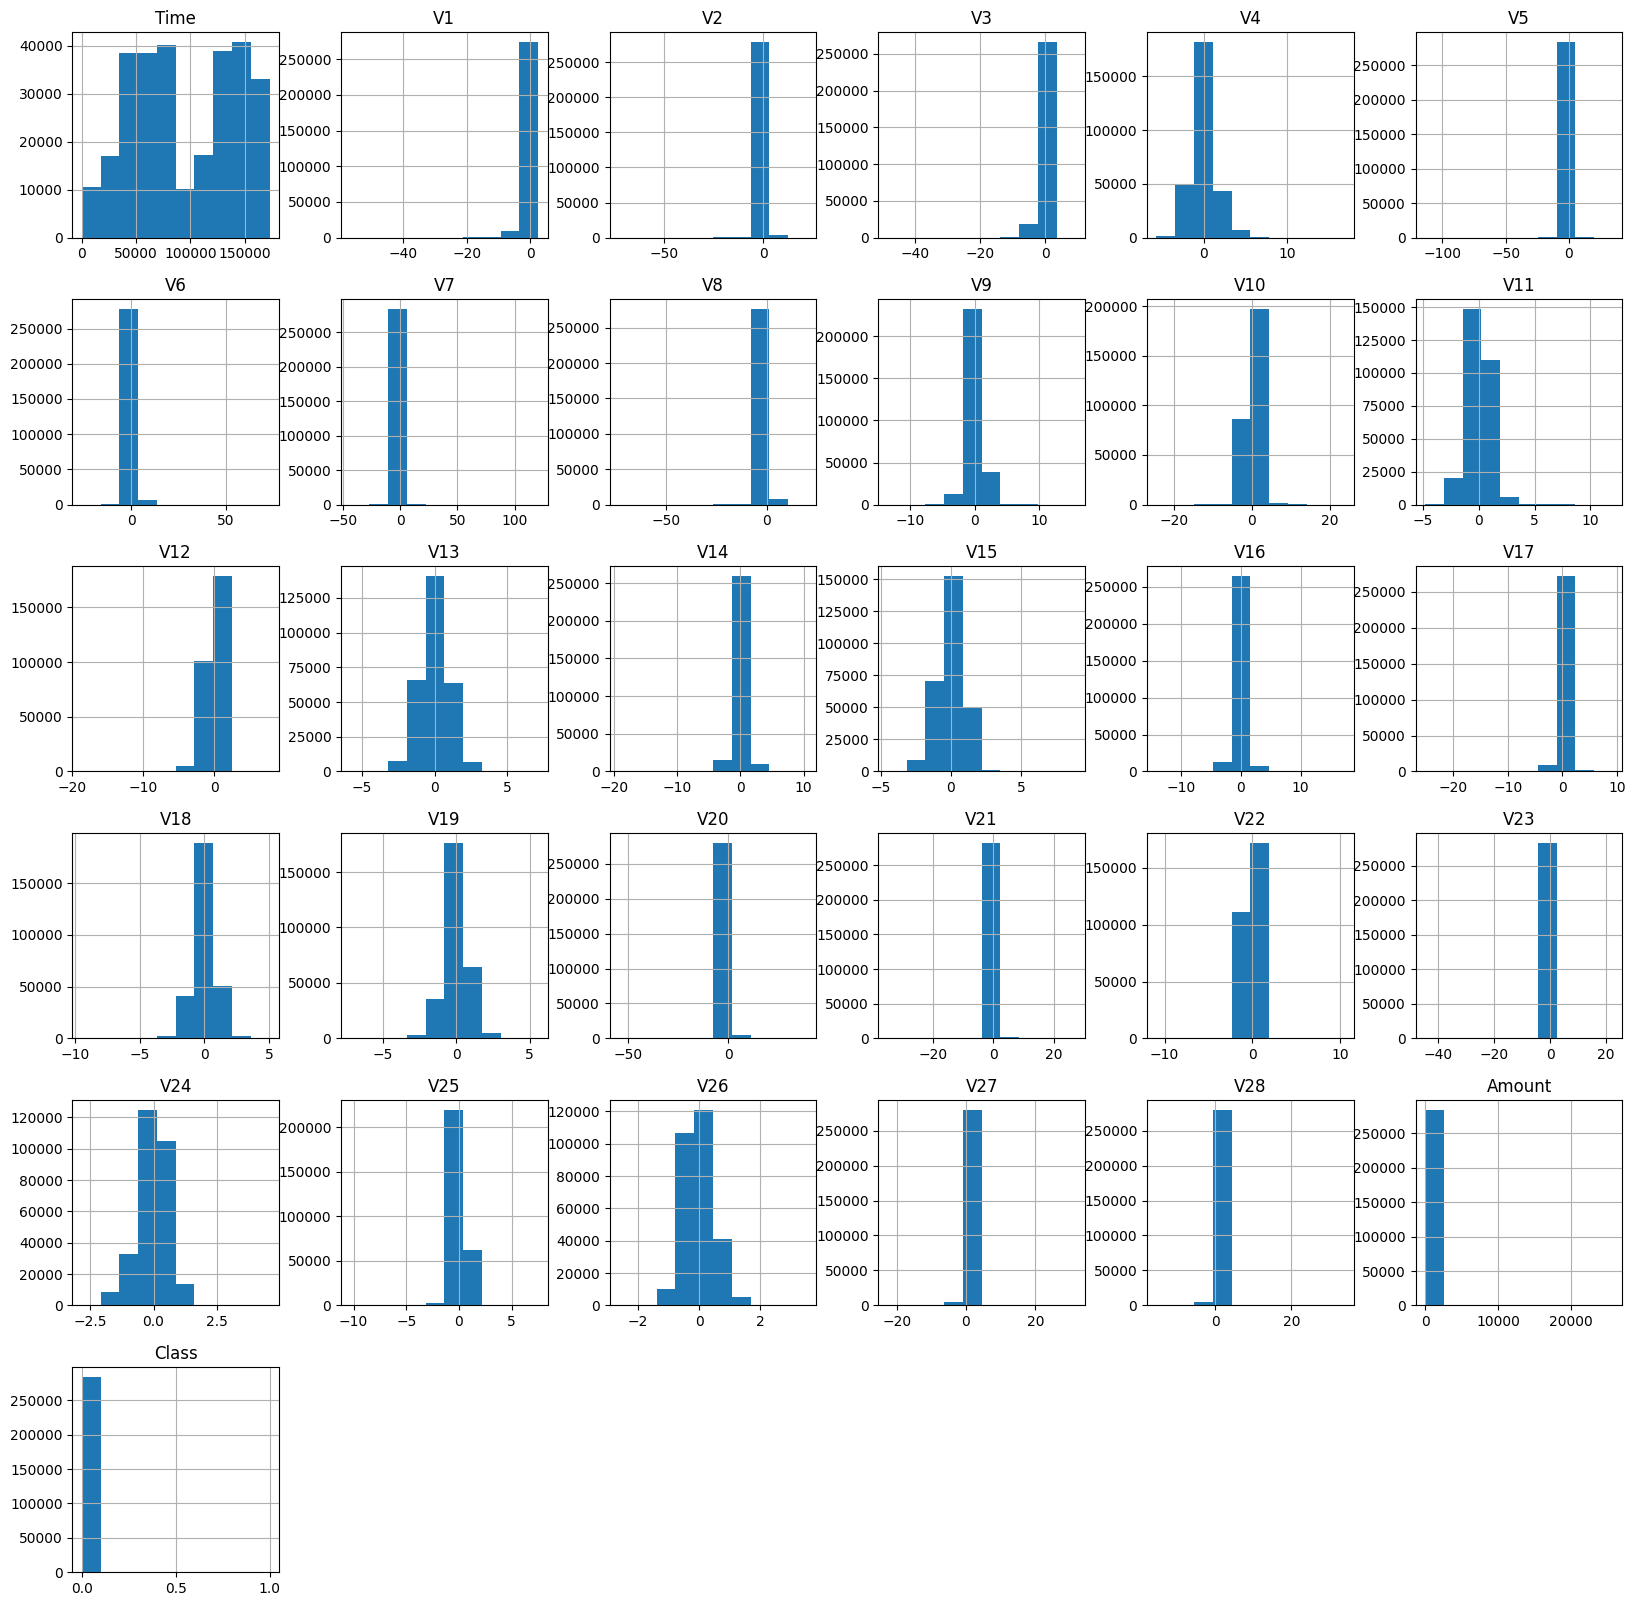

In [45]:
df.hist(figsize = (20, 20))
plt.show()

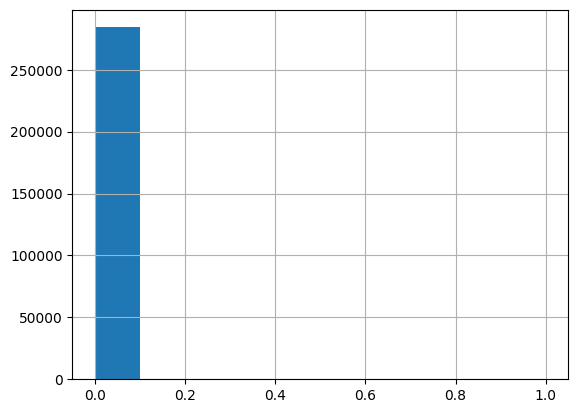

In [46]:
df['Class'].hist()
plt.show()

# **Data distribution Analysis**




In [47]:
df["Class"].value_counts()


0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unbalanced

class 0 represents Normal Transaction
class 1 represents fraudulent transaction

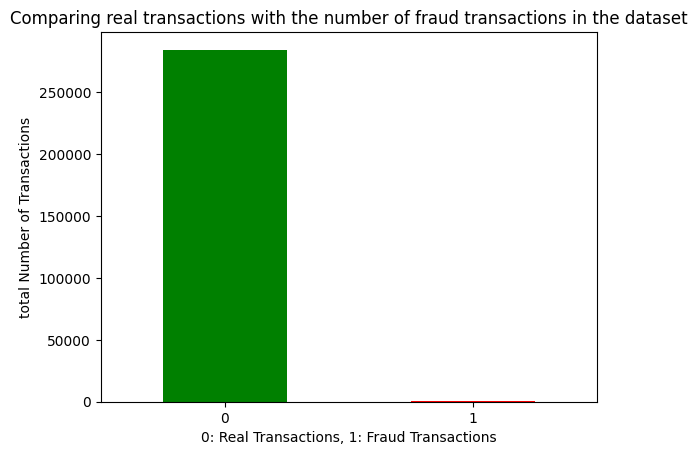

In [48]:
#Lets visualize this
df.Class.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("total Number of Transactions")
plt.title("Comparing real transactions with the number of fraud transactions in the dataset")
plt.xticks(rotation=0);

As you can see, the dataset is highly imbalanced which can significantly affect out ML model. A balanced dataset is best for training purposes

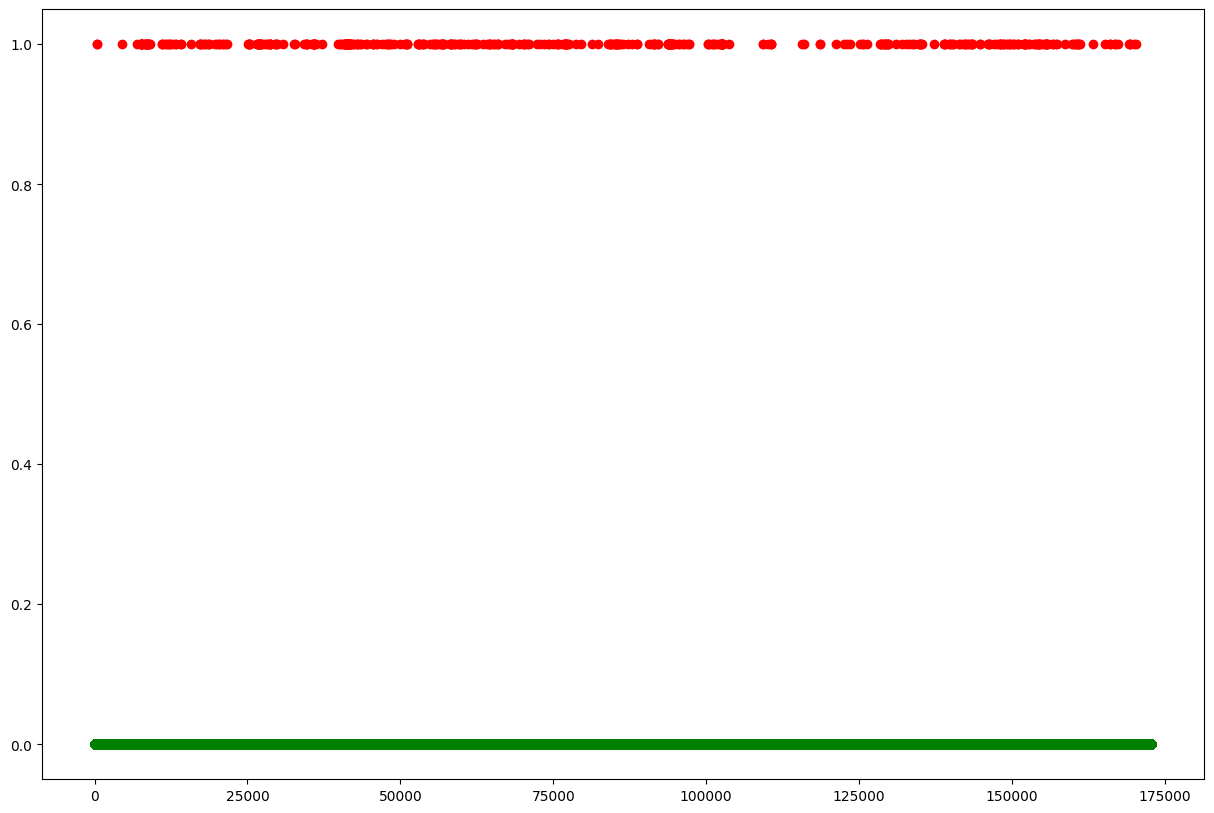

In [49]:
#See if the transactions occur at a given time period
plt.figure(figsize=(15,10))
plt.scatter(df.Time[df.Class==1], df.Class[df.Class==1], c="red")
plt.scatter(df.Time[df.Class==0], df.Class[df.Class==0], c="green");


There is no pattern for when the fraudulent activites occur. They happen at random

In [50]:

max(df.Amount[df.Class==1]), min(df.Amount[df.Class==0])

(2125.87, 0.0)

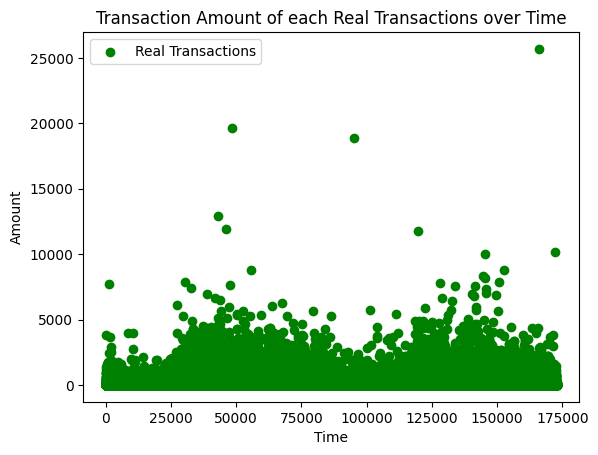

In [51]:
#plt.figure(figsize=(10,6))
plt.scatter(df.Time[df.Class==0],df.Amount[df.Class==0], color=["green"])

plt.title("Transaction Amount of each Real Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Real Transactions"]);


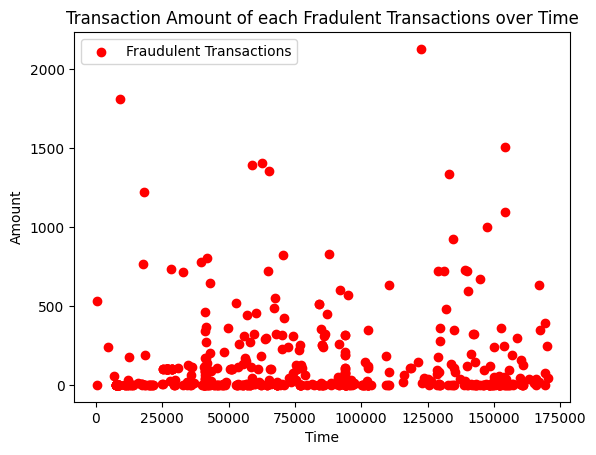

In [52]:
plt.scatter(df.Time[df.Class==1],df.Amount[df.Class==1], color=["red"])

plt.title("Transaction Amount of each Fradulent Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Fraudulent Transactions"]);

The Transaction amount for each fraudulent transaction is significantly lower compared to the Real transactions. This makes it a lot more difficult to detect fraud activities. The max amount is approxiamtely $2100

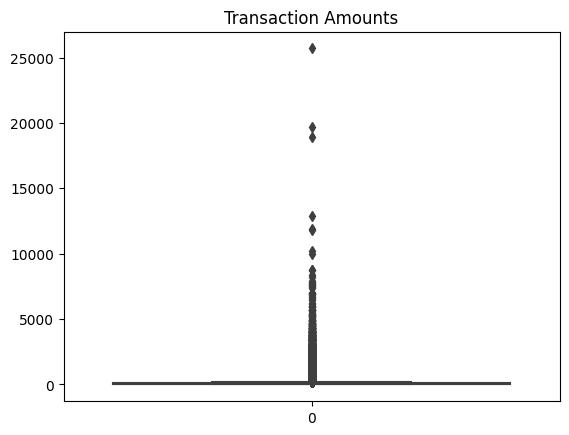

In [53]:
#plt.figure(figsize=(10,5))
sns.boxplot(df["Amount"])
plt.title("Transaction Amounts");

In [54]:
df.Amount.skew()

16.977724453761024

The Amount is heavily right-skewed with a lot of outliers which we can fix using BoxCox transformation

# Lets look at the Mean and Standard Deviations for V1-V28 feature

In [55]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


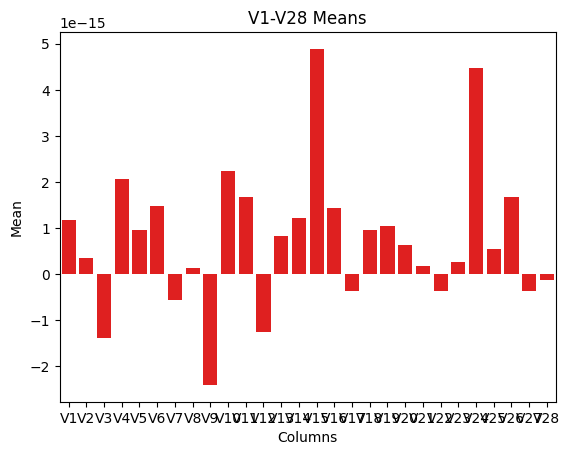

In [56]:
vs = df.drop(labels=["Time", "Amount","Class"], axis=1)

#plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.mean(), color="red")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.title("V1-V28 Means");

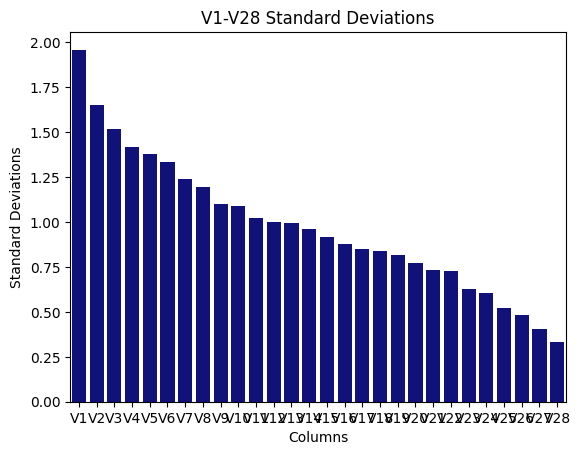

In [57]:
#plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.std(), color="darkblue")
plt.xlabel("Columns")
plt.ylabel("Standard Deviations")
plt.title("V1-V28 Standard Deviations");

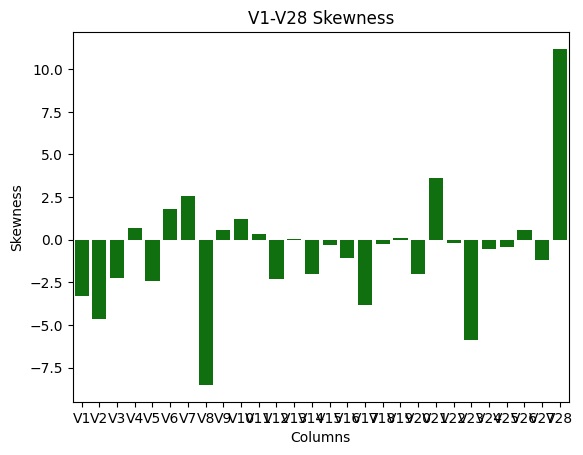

In [58]:
#plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.skew(), color="green")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.title("V1-V28 Skewness");

In [59]:
vs.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [60]:
# separating data for further analysis
valid = df[df.Class == 0]
fraud = df[df.Class == 1]
print(valid.shape)
print(fraud.shape)
# statistical measures of the data for amouunt field
valid.Amount.describe()

(284315, 31)
(492, 31)


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [61]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Correlation Matrix to see how each variable is related to each other and the target variable

In [62]:
!pip install --upgrade numpy

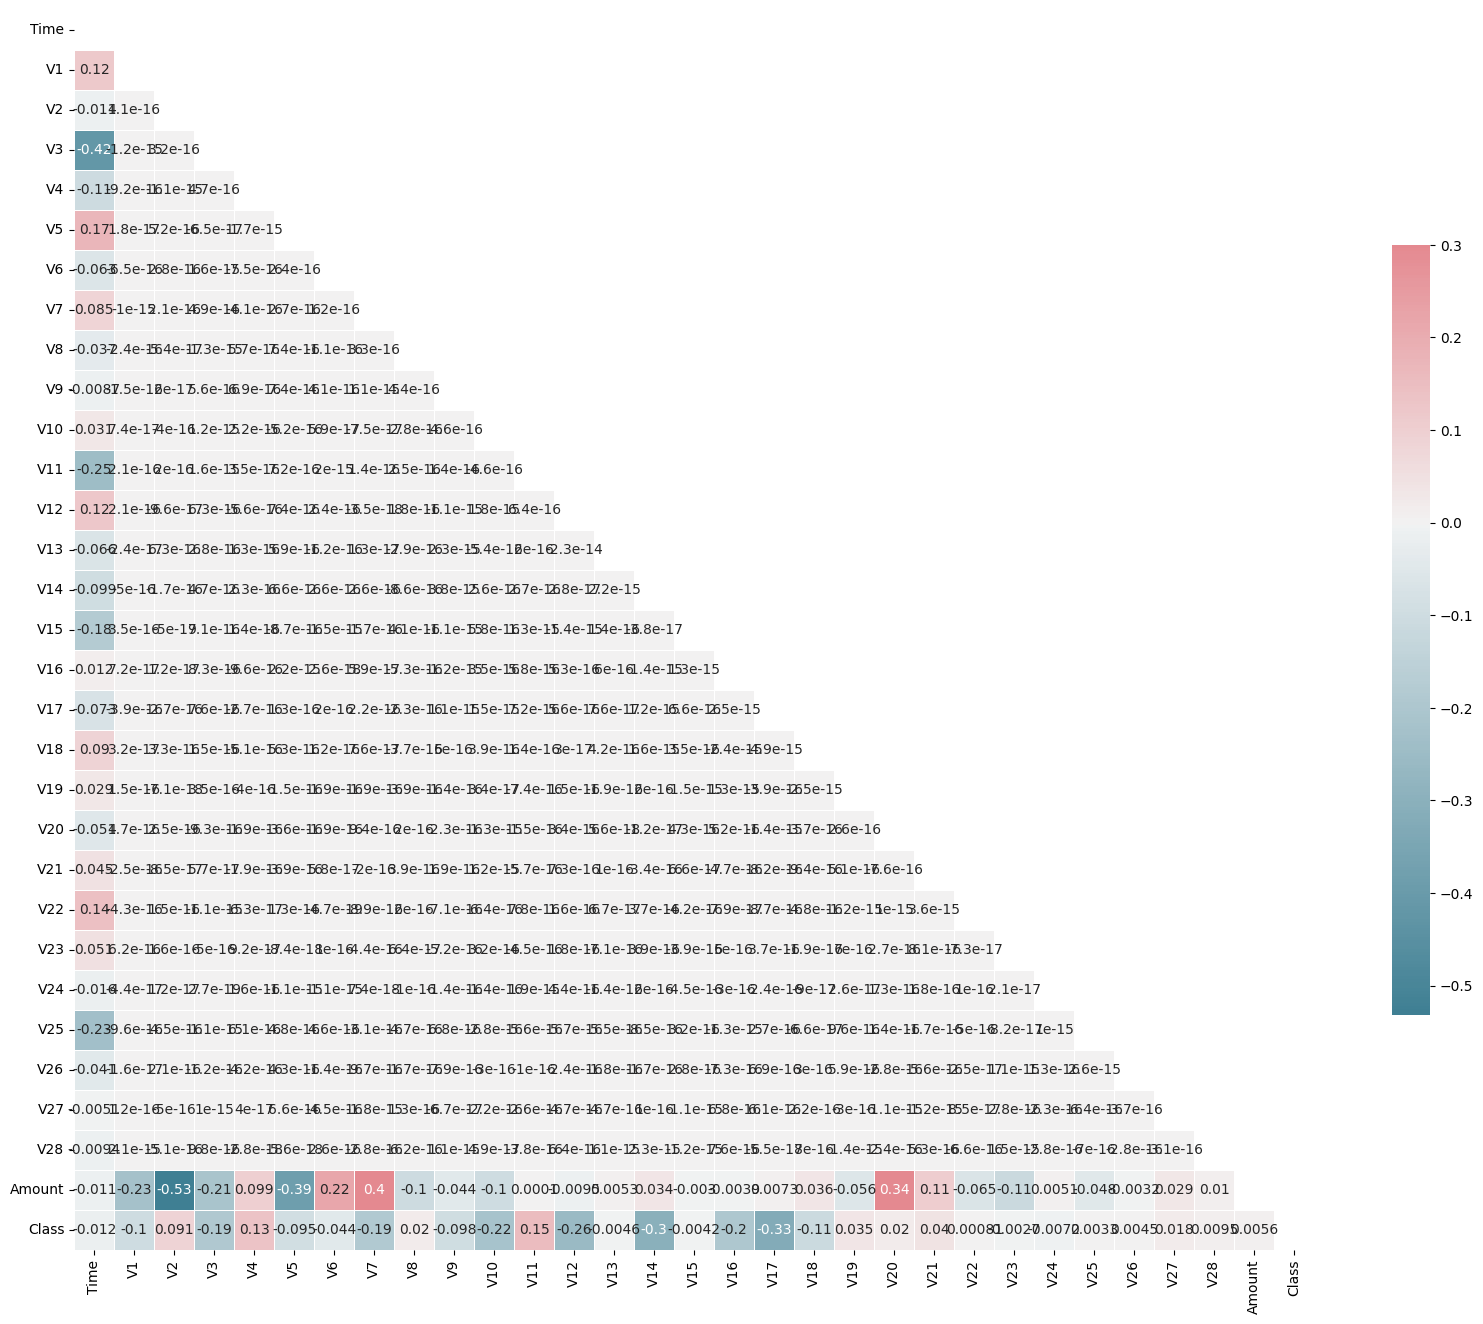

In [63]:
corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Correlation matrix does not make sense. There is no correlation between the V# variables due to the PCA performed on the features. A correlation matrix only makes sense if the values are linear. Therefore, we are going to have to use other techniques to visualize and fit the data to the Machine Learning model



In [64]:
X=df.drop("Class", axis=1)
y=df.Class
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [65]:
y_train.value_counts(), y_test.value_counts()

(0    199008
 1       356
 Name: Class, dtype: int64,
 0    85307
 1      136
 Name: Class, dtype: int64)

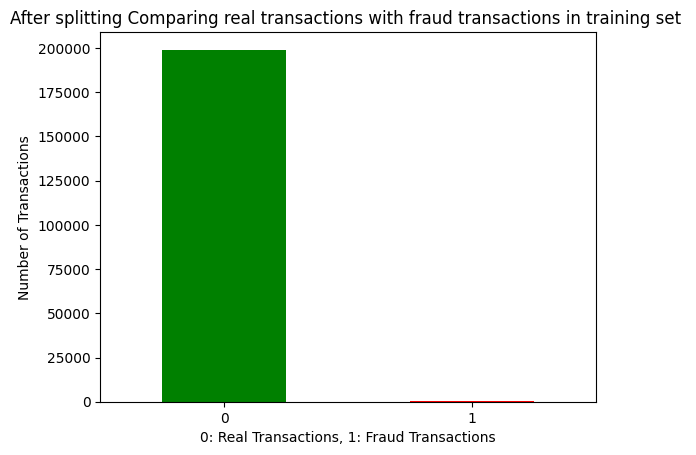

In [66]:
y_train.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("After splitting Comparing real transactions with fraud transactions in training set ")
plt.xticks(rotation=0);

# StandardScaler

In [67]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [68]:
X_train[0]

array([-1.95144063, -1.16681856, -0.28654908,  0.53924737, -1.20368154,
        0.58967831, -1.23993846,  0.75411155, -0.45490037,  1.2064479 ,
       -0.39869658,  0.32182001,  0.58170129,  0.11222719, -0.22290476,
        1.38644463, -1.0221033 , -0.35174842, -0.7336555 , -0.49340827,
       -1.06710984, -0.28780091,  1.26352311,  1.37067196,  0.69925952,
        0.59643511, -1.6211327 ,  0.96676   , -0.4486209 , -0.33974783])

# RobustScaler

In [69]:
rs=RobustScaler()
X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

#  OverSampling to fix the imbalanced dataset

Lets compare RandomOverSampler and SMOTE to see which yields better results

# RandomOverSamples

In [70]:
X_train, y_train

(array([[-9.69678271e-01, -1.03021196e+00, -3.89853106e-01, ...,
          2.40755159e+00, -1.20903442e+00, -2.92621752e-01],
        [ 8.12154550e-01, -1.46415710e-01, -2.94566741e+00, ...,
         -1.79529722e+00,  7.51939966e-01,  1.63349822e+01],
        [ 1.49019884e-01, -8.15596610e-01, -4.52020772e-01, ...,
         -3.91749500e-01,  5.82663156e-01,  7.38521563e-01],
        ...,
        [-5.65296474e-02, -7.16684334e-02,  6.60692298e-01, ...,
         -7.53519424e-01, -1.57703469e+00, -2.51654706e-01],
        [ 3.90988402e-02, -1.32501489e+00,  1.63186753e+00, ...,
          3.05204820e+00,  2.46482626e+00, -2.92621752e-01],
        [-9.66569404e-02,  5.45508041e-01, -6.07057191e-01, ...,
         -1.30272865e-04,  2.06669957e-01,  1.26802759e+00]]),
 2557      0
 247823    0
 152342    0
 103385    0
 8771      0
          ..
 119879    0
 259178    0
 131932    0
 146867    0
 121958    0
 Name: Class, Length: 199364, dtype: int64)

# Making sure is actually correctly balancing the dataset out

Text(0.5, 1.0, 'Count of "Class" feature in training set after ')

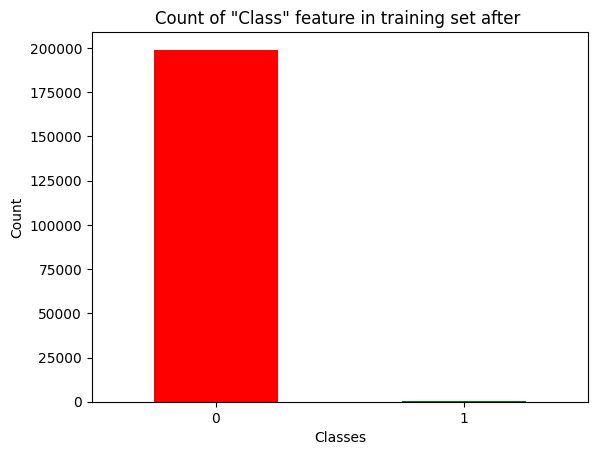

In [71]:
lol=pd.DataFrame(data=y_train, columns=["Class"])
lol.Class.value_counts().plot.bar(color=["Red", "Green"]);
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Count of \"Class\" feature in training set after ")